<a href="https://colab.research.google.com/github/Erfandarzi/medscale/blob/main/Copy_of_Untitled79.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://gitlab.com/LVolmer/argos-torch-test.git
# !mv /content/drive/MyDrive/drive-download-20221011T112349Z-001.zip "./"
# !gdown 1ibYL27V0ObOqxyqTpJ6ydulDnHDHrIqP 
# !unzip "drive-download-20221011T112349Z-001.zip"

In [ ]:
!git clone https://github.com/Erfandarzi/medscale.git

Cloning into 'medscale'...
remote: Enumerating objects: 10510, done.
remote: Counting objects: 100% (2878/2878), done.
remote: Compressing objects: 100% (1262/1262), done.
remote: Total 10510 (delta 1922), reused 2486 (delta 1547), pack-reused 7632
Receiving objects: 100% (10510/10510), 23.40 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (6888/6888), done.


In [ ]:
%cd /content/medscale/out



/content/medscale/out


In [ ]:
#@title Your Title Here
import os
import matplotlib.pyplot as plt 
import numpy as np
import re
out_folder="/content/medscale/out/" 
alphas = [] 
FedAvg_results = []
Vit_results = []
train_nums={}

# Create a list of dataframes
list_df = []

for item in os.listdir(out_folder): 
    if ("FedAvg" in item and not "client" in item and not "resnet" in item): 
        alpha=float((re.findall(r'0\.\d+',item)[0]))
        train_nums[alpha]=[] 
        file_path= out_folder+item 
        result_item=(extract_clientlog_df(file_path)) 
        for i in range (len(result_item["Results_raw"])):
              train_nums[alpha].append(result_item["Results_raw"][i]['train_total'])

        train_nums[alpha]=(sorted( train_nums[alpha][:10],reverse=True))
        # FedAvg_results.append(result_item["Results_avg"][9]["train_total"]) 
train_nums = dict(sorted(train_nums.items(), key=lambda x: x[0]))
df = pd.DataFrame(train_nums).T

# Plot the bar chart 
ax = df.plot.bar(stacked=True, figsize=(14, 10), color=['#001751','#776f96','#FAAB1A','#EE964B','#DE4789','#AF1255','#53002F','#A07A2F','#FAF3E8','#FF6C3B'])

# Set labels for x-axis and y-axis
ax.set_xlabel("Alphas")
ax.set_ylabel("Number of samples in participating clients")

# Show the graph
plt.show()

NameError: ignored

In [ ]:
cd ..

/content/medscale


In [ ]:
#@title Your Title Here

import os
import re

for item in os.listdir("out"):
    file_path="out/"+item
    f = open(file_path, "r")
    log = f.read()
    f.close()
    f = open(file_path, "w")
    datalist=re.split(r"the current machine",log)[-1]
    f.write(datalist)

In [ ]:
#@title Your Title Here

import re
import json

#Finding server outputs to a PD dataframe
#converts the output results for a specific line in logfile into a dicitonary
def to_dict (logfile,message):
    start_idx = logfile.find(message)
    end_idx = logfile.find("\n", start_idx)
    data = logfile[start_idx+len(message):end_idx]
    data= data.replace("'", '"')
    data= data.replace("nan", "0")
    data= data.rsplit('}', 1)[0]
    dict1  = list(data)
    dict1[0]="{"
    dict1.append("}")
    dict1=''.join(dict1)
    dict1=json.loads(str(dict1))
    return dict1

#Extracts all the occurnces of serverfile log
def extract_serverlog_df(file_path):
      f = open(file_path, "r")
      log = f.read()
      f.close()
      datalist=re.split(r"(?=\(server\:590\)\sINFO\:\s)",log)[1:]
      dataframelist=[]
      for item in datalist:
        dataframelist.append(to_dict(item,"(server:590) INFO: "))
    
      return pd.DataFrame(dataframelist)
#Extracts all the occurnces of serverfile log

def extract_clientlog_df(file_path):
      f = open(file_path, "r")
      log = f.read()
      f.close()
      datalist=re.split(r"(?=\(client\:306\)\sINFO\:\s)",log)[1:]
      dataframelist=[]
      for item in datalist:
        dataframelist.append(to_dict(item,"(client:306) INFO: "))
    
      return pd.DataFrame(dataframelist)

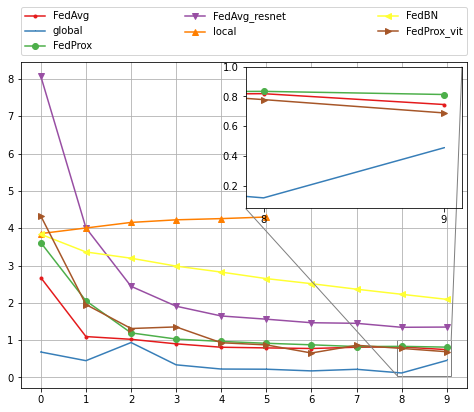

In [ ]:
#@title Your Title Here

import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

out_folder="/content/medscale/out/"
marker = {'m00': '.', 'm01': ',', 'm02': 'o', 'm03': 'v', 'm04': '^', 'm05': '<', 'm06': '>', 'm07': '1', 'm08': '2', 'm09': '3', 'm10': '4', 'm11': 's', 'm12': 'p', 'm13': '*', 'm14': 'h', 'm15': 'H', 'm16': '+', 'm17': 'x', 'm18': 'X', 'm19': 'D', 'm20': 'd', 'm21': '|', 'm22': '_'}
count = 0
fig, ax = plt.subplots(figsize=[8,6])

for item in os.listdir(out_folder):
    if ("0.2" in item and "sample" not in item):
        test_loss=[]
        test_round=[]
        file_path= out_folder+item
        result_item=(extract_serverlog_df(file_path))
        for i in range(len(result_item)):
            test_round.append(i)
            test_loss.append(result_item["Results_weighted_avg"][i]["test_avg_loss"])

        plt.plot(test_round,test_loss,label=item[:-21], color=plt.cm.Set1(count), marker=marker[list(marker.keys())[count]])
        count += 1
count = 0
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.grid(visible=True)
plt.xticks(range(10))
axins = zoomed_inset_axes(ax, 4, loc='upper right') # zoom = 5
for item in os.listdir(out_folder):
    if ("0.2" in item and "sample" not in item):
        test_loss=[]
        test_round=[]
        file_path= out_folder+item
        result_item=(extract_serverlog_df(file_path))
        for i in range(len(result_item)):
            test_round.append(i)
            test_loss.append(result_item["Results_weighted_avg"][i]["test_avg_loss"])
        axins.plot(test_round,test_loss,label=item[:-21], color=plt.cm.Set1(count), marker=marker[list(marker.keys())[count]])

        count += 1


plt.xticks(range(10))

# Sub region of the original image
x1, x2, y1, y2 = 7.9, 9.1,0.05,1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

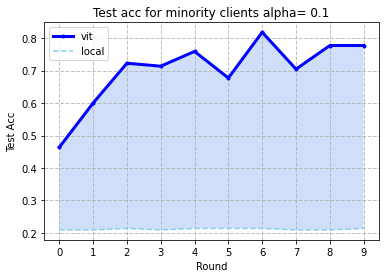

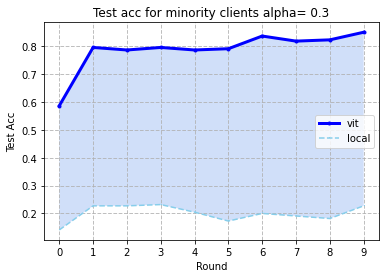

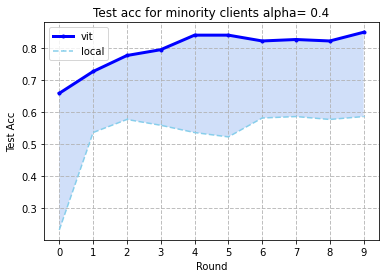

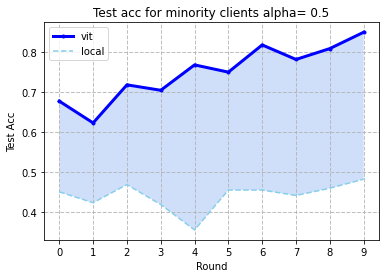

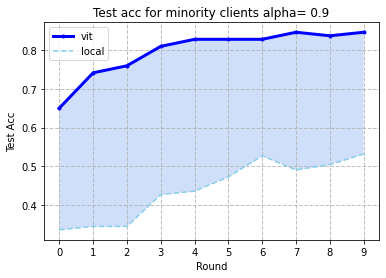

In [ ]:
#@title Your Title Here

import matplotlib.pyplot as plt
import pandas as pd
import os 
import re
 
out_folder="/content/medscale/out/"

for alpha_item in [0.1 ,0.3,0.4,0.5,0.9]:
  count=0
  jamshid={}
  for mode in ["vit","local"]:
    test_bottom_loss=[]
    test_top_loss=[]
    test_avg_acc=[]
    test_avg_loss=[]
    alpha=[]
    for item in os.listdir(out_folder): 
        if (mode in item and not "client" in item and not "resnet" in item):
            alpha=float((re.findall(r'0\.\d+',item))[0])
            if (alpha_item==alpha):
                file_path= out_folder+item
                result_item=(extract_serverlog_df(file_path))
                marker = {'m00': '.', 'm01': ',', 'm02': 'o', 'm03': 'v', 'm04': '^', 'm05': '<', 'm06': '>', 'm07': '1', 'm08': '2', 'm09': '3', 'm10': '4', 'm11': 's', 'm12': 'p', 'm13': '*', 'm14': 'h', 'm15': 'H', 'm16': '+', 'm17': 'x', 'm18': 'X', 'm19': 'D', 'm20': 'd', 'm21': '|', 'm22': '_'}
                colors = ['blue', 'skyblue', 'cornflowerblue', 'mediumpurple', 'indigo', 'violet', 'pink', 'grey', 'yellow', 'black']
                test_acc_per_round = [result_item["Results_weighted_avg"][i]["test_acc"] for i in range (10)]
                jamshid[count]=test_acc_per_round
    if (mode=="vit"):
        plt.plot([i for i in range(10)], test_acc_per_round, marker=marker[list(marker.keys())[count]],color=colors[count],label=mode, linewidth=3)
    else:
        plt.plot([i for i in range(10)], test_acc_per_round, marker=marker[list(marker.keys())[count]],color=colors[count],label=mode, linestyle='--') 

    count +=1

  plt.fill_between([i for i in range(10)],jamshid[0],jamshid[1], facecolor ='cornflowerblue', alpha = 0.3)
  plt.xticks(range(10))

  plt.xlabel('Round')
  plt.ylabel('Test Acc')
  plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.8 )
  plt.title('Test acc for minority clients alpha= '+str(alpha_item))
  plt.legend()
  plt.show()

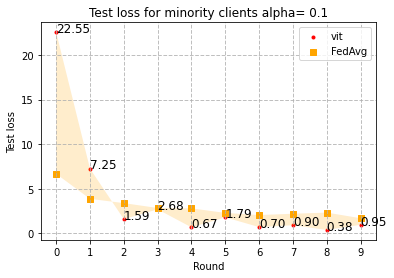

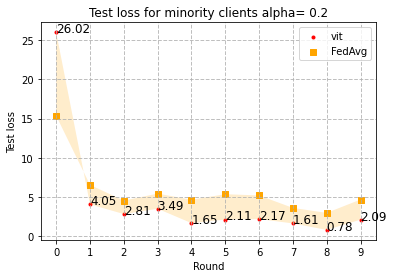

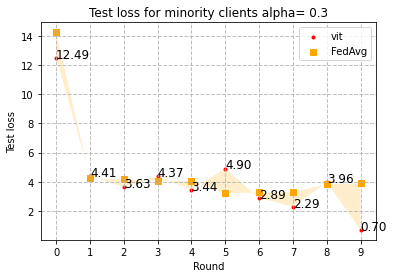

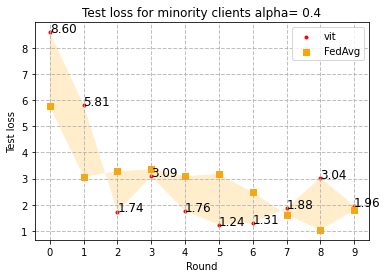

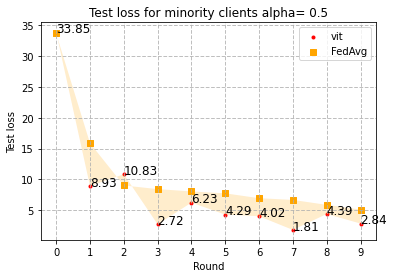

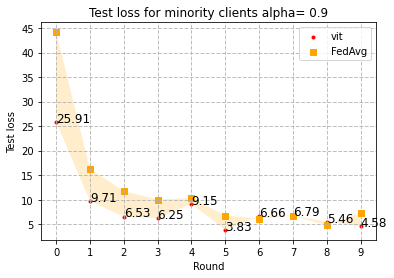

In [ ]:
#@title Your Title Here


out_folder="/content/medscale/out/"
import matplotlib.pyplot as plt
import pandas as pd
def plot_scatter_errorbar(x, y, yerr_bottom, yerr_top,marker,color,label,text_plot=False):
    plt.scatter(x, y,  marker=marker,color=color,label=label)
    if text_plot:
      for i in range (len(x)):
          plt.text(x[i], y[i], "{:.2f}".format(y[i]), fontsize=12)
          
for alpha_item in [0.1,0.2,0.3,0.4,0.5,0.9]:
  count=0
  jamshid={}
  for mode in ["vit","FedAvg"]:
    test_bottom_loss=[]
    test_top_loss=[]
    test_avg_acc=[]
    test_avg_loss=[]
    alpha=[]
    for item in os.listdir(out_folder): 
        if (mode in item and not "client" in item and not "resnet" in item):
            alpha=float((re.findall(r'0\.\d+',item))[0])
            if (alpha_item==alpha):
                file_path= out_folder+item
                result_item=(extract_serverlog_df(file_path))
                marker = {'m00': '.', 'm01': ',', 'm02': 'o', 'm03': 'v', 'm04': '^', 'm05': '<', 'm06': '>', 'm07': '1', 'm08': '2', 'm09': '3', 'm10': '4', 'm11': 's', 'm12': 'p', 'm13': '*', 'm14': 'h', 'm15': 'H', 'm16': '+', 'm17': 'x', 'm18': 'X', 'm19': 'D', 'm20': 'd', 'm21': '|', 'm22': '_'}
                colors = ['red', 'orange', 'green', 'blue', 'indigo', 'violet', 'pink', 'grey', 'yellow', 'black']
                test_acc_per_round = [result_item["Results_fairness"][i]["test_loss_bottom_decile"] for i in range (10)]
                # test_acc_per_round = [result_item["Results_weighted_avg"][i]["test_avg_loss"] for i in range (10)]

                # test_avg_acc.append(result_item["Results_weighted_avg"][i]["test_acc"] for i in range (10))
    jamshid[count]=test_acc_per_round
    if (mode=="vit"):
        plot_scatter_errorbar([i for i in range(10)], test_acc_per_round, test_bottom_loss, test_top_loss,marker=marker[list(marker.keys())[count]],color=colors[count],label=mode,text_plot=True)
    else:
        plot_scatter_errorbar([i for i in range(10)], test_acc_per_round, test_bottom_loss, test_top_loss,marker=marker[list(marker.keys())[count]],color=colors[count],label=mode,text_plot=False)

    count +=1


  # ax.fill_between(x, y1, y2, where = y2 >y1, 
  #                 facecolor ='green', alpha = 0.8)
    
  # ax.fill_between(x, y1, y2, where = y2 <= y1,
  #                 facecolor ='black', alpha = 0.8)

  plt.fill_between([i for i in range(10)],jamshid[0],jamshid[1], facecolor ='orange', alpha = 0.2)
  plt.xticks(range(10))

  plt.xlabel('Round')
  plt.ylabel('Test loss')
  plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.8 )
  plt.title('Test loss for minority clients alpha= '+str(alpha_item))
  plt.legend()
  plt.show()

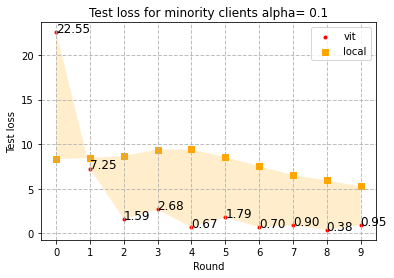

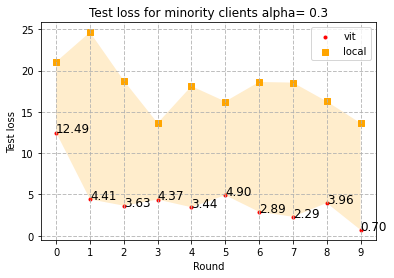

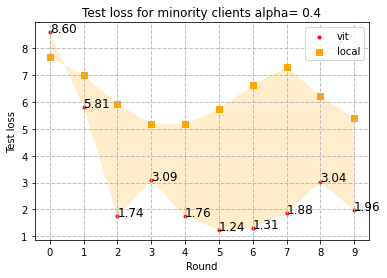

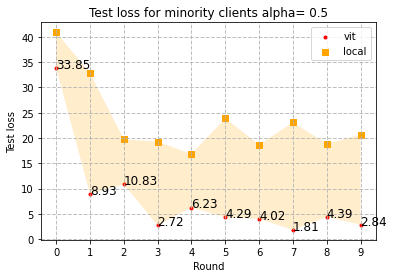

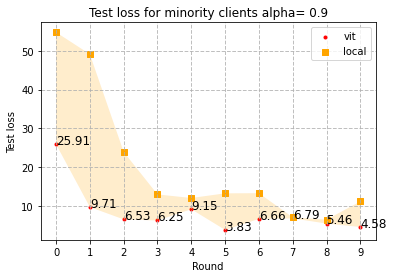

In [ ]:
#@title Your Title Here
'''
Comparing how much the efficiency of local models can be improved on generalized data

'''


out_folder="/content/medscale/out/"
import matplotlib.pyplot as plt
import pandas as pd
def plot_scatter_errorbar(x, y, yerr_bottom, yerr_top,marker,color,label,text_plot=False):
    plt.scatter(x, y,  marker=marker,color=color,label=label)
    if text_plot:
      for i in range (len(x)):
          plt.text(x[i], y[i], "{:.2f}".format(y[i]), fontsize=12)
          
for alpha_item in [0.1 ,0.3,0.4,0.5,0.9]:
  count=0
  jamshid={}
  for mode in ["vit","local"]:
    test_bottom_loss=[]
    test_top_loss=[]
    test_avg_acc=[]
    test_avg_loss=[]
    alpha=[]
    for item in os.listdir(out_folder): 
        if (mode in item and not "client" in item and not "resnet" in item):
            alpha=float((re.findall(r'0\.\d+',item))[0])
            if (alpha_item==alpha):
                file_path= out_folder+item
                result_item=(extract_serverlog_df(file_path))
                marker = {'m00': '.', 'm01': ',', 'm02': 'o', 'm03': 'v', 'm04': '^', 'm05': '<', 'm06': '>', 'm07': '1', 'm08': '2', 'm09': '3', 'm10': '4', 'm11': 's', 'm12': 'p', 'm13': '*', 'm14': 'h', 'm15': 'H', 'm16': '+', 'm17': 'x', 'm18': 'X', 'm19': 'D', 'm20': 'd', 'm21': '|', 'm22': '_'}
                colors = ['red', 'orange', 'green', 'blue', 'indigo', 'violet', 'pink', 'grey', 'yellow', 'black']
                test_acc_per_round = [result_item["Results_fairness"][i]["test_loss_bottom_decile"] for i in range (10)]
                # test_acc_per_round = [result_item["Results_weighted_avg"][i]["test_avg_loss"] for i in range (10)]

                # test_avg_acc.append(result_item["Results_weighted_avg"][i]["test_acc"] for i in range (10))
    jamshid[count]=test_acc_per_round
    if (mode=="vit"):
        plot_scatter_errorbar([i for i in range(10)], test_acc_per_round, test_bottom_loss, test_top_loss,marker=marker[list(marker.keys())[count]],color=colors[count],label=mode,text_plot=True)
    else:
        plot_scatter_errorbar([i for i in range(10)], test_acc_per_round, test_bottom_loss, test_top_loss,marker=marker[list(marker.keys())[count]],color=colors[count],label=mode,text_plot=False)

    count +=1


  # ax.fill_between(x, y1, y2, where = y2 >y1, 
  #                 facecolor ='green', alpha = 0.8)
    
  # ax.fill_between(x, y1, y2, where = y2 <= y1,
  #                 facecolor ='black', alpha = 0.8)

  plt.fill_between([i for i in range(10)],jamshid[0],jamshid[1], facecolor ='orange', alpha = 0.2)
  plt.xticks(range(10))

  plt.xlabel('Round')
  plt.ylabel('Test loss')
  plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.8 )
  plt.title('Test loss for minority clients alpha= '+str(alpha_item))
  plt.legend()
  plt.show()

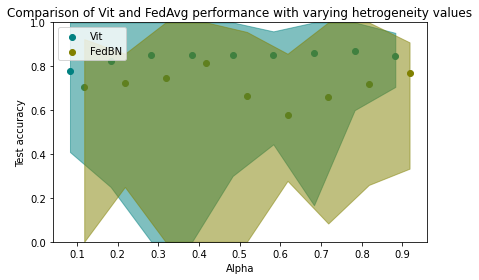

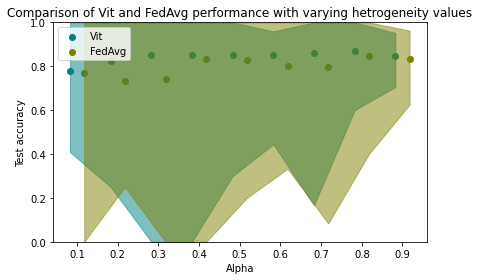

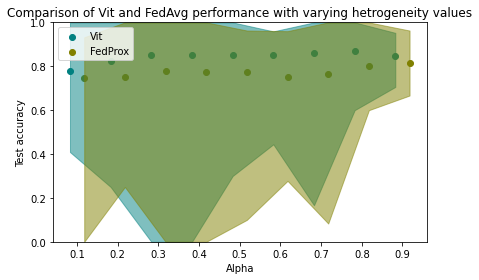

In [ ]:
#@title Your Title Here
#@title Your Title Here

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import os 
import re 

out_folder = './out/'

import numpy as np 
test_bottom_loss=[]
test_top_loss=[]
test_avg_loss_vit=[]
test_avg_loss_fed=[]
test_bottom_loss_vit=[]
test_top_loss_vit=[]
test_top_loss_fed=[]
test_bottom_loss_fed=[]

alphas=[]
counter=0
b=4
colors = ['darkblue', 'blue', 'skyblue', 'cyan', 'teal', 'olive', 'lime', 'maroon', 'brown', 'aqua']

for mode in ["vit","FedBN"]:
  test_bottom_loss=[]
  test_top_loss=[]
  test_avg_loss=[]
  alphas=[]
  for item in sorted(os.listdir(out_folder)):
      if (mode in item and not "client" in item and not "resnet" in item):
          alphas.append(float((re.findall(r'0\.\d+',item)[0])))
          file_path= out_folder+item

          result_item=(extract_serverlog_df(file_path))
          if mode == "vit":
            test_avg_loss_vit.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_vit.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_vit.append(result_item["Results_fairness"][9]["test_acc_top10%"])

          elif mode == "FedBN":
            test_avg_loss_fed.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_fed.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_fed.append(result_item["Results_fairness"][9]["test_acc_top10%"])

X = np.arange(len(alphas))
width = 0.35

fig, ax = plt.subplots() 
scatter_vit = ax.scatter(X - width/2, test_avg_loss_vit, c=colors[b], label="Vit")
scatter_fed = ax.scatter(X + width/2, test_avg_loss_fed, c=colors[b+1], label="FedBN")

# Add shaded areas to represent the error bars 
ax.fill_between(X - width/2, np.absolute(test_bottom_loss_vit), np.absolute(test_top_loss_vit), alpha=0.5, color=colors[b])
ax.fill_between(X + width/2, np.absolute(test_bottom_loss_fed), np.absolute(test_top_loss_fed), alpha=0.5, color=colors[b+1])

ax.set_xlabel('Alpha')
ax.set_ylabel('Test accuracy')
ax.set_title('Comparison of Vit and FedAvg performance with varying hetrogeneity values')
ax.set_xticks(X)
ax.set_xticklabels(alphas)
ax.legend()
plt.ylim([0,1])

fig.tight_layout()
plt.show()



import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import os 
import re 

out_folder = './out/'

import numpy as np 
test_bottom_loss=[]
test_top_loss=[]
test_avg_loss_vit=[]
test_avg_loss_fed=[]
test_bottom_loss_vit=[]
test_top_loss_vit=[]
test_top_loss_fed=[]
test_bottom_loss_fed=[]

alphas=[]
counter=0
b=4
colors = ['darkblue', 'blue', 'skyblue', 'cyan', 'teal', 'olive', 'lime', 'maroon', 'brown', 'aqua']

for mode in ["vit","FedAvg"]:
  test_bottom_loss=[]
  test_top_loss=[]
  test_avg_loss=[]
  alphas=[]
  for item in sorted(os.listdir(out_folder)):
      if (mode in item and not "client" in item and not "resnet" in item):
          alphas.append(float((re.findall(r'0\.\d+',item)[0])))
          file_path= out_folder+item

          result_item=(extract_serverlog_df(file_path))
          if mode == "vit":
            test_avg_loss_vit.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_vit.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_vit.append(result_item["Results_fairness"][9]["test_acc_top10%"])

          elif mode == "FedAvg":
            test_avg_loss_fed.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_fed.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_fed.append(result_item["Results_fairness"][9]["test_acc_top10%"])

X = np.arange(len(alphas))
width = 0.35

fig, ax = plt.subplots() 
scatter_vit = ax.scatter(X - width/2, test_avg_loss_vit, c=colors[b], label="Vit")
scatter_fed = ax.scatter(X + width/2, test_avg_loss_fed, c=colors[b+1], label="FedAvg")

# Add shaded areas to represent the error bars 
ax.fill_between(X - width/2, np.absolute(test_bottom_loss_vit), np.absolute(test_top_loss_vit), alpha=0.5, color=colors[b])
ax.fill_between(X + width/2, np.absolute(test_bottom_loss_fed), np.absolute(test_top_loss_fed), alpha=0.5, color=colors[b+1])

ax.set_xlabel('Alpha')
ax.set_ylabel('Test accuracy')
ax.set_title('Comparison of Vit and FedAvg performance with varying hetrogeneity values')
ax.set_xticks(X)
ax.set_xticklabels(alphas)
ax.legend()
plt.ylim([0,1])

fig.tight_layout()
plt.show()



import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import os 
import re 

out_folder = './out/'

import numpy as np 
test_bottom_loss=[]
test_top_loss=[]
test_avg_loss_vit=[]
test_avg_loss_fed=[]
test_bottom_loss_vit=[]
test_top_loss_vit=[]
test_top_loss_fed=[]
test_bottom_loss_fed=[]

alphas=[]
counter=0
b=4
colors = ['darkblue', 'blue', 'skyblue', 'cyan', 'teal', 'olive', 'lime', 'maroon', 'brown', 'aqua']

for mode in ["FedProx_vit","FedProx_on"]:
  test_bottom_loss=[]
  test_top_loss=[]
  test_avg_loss=[]
  alphas=[]
  for item in sorted(os.listdir(out_folder)):
      if (mode in item and "alpha" in item):
          alphas.append(float((re.findall(r'0\.\d+',item)[0])))
          file_path= out_folder+item

          result_item=(extract_serverlog_df(file_path))
          if mode == "FedProx_vit":
            test_avg_loss_vit.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_vit.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_vit.append(result_item["Results_fairness"][9]["test_acc_top10%"])

          elif mode == "FedProx_on":
            test_avg_loss_fed.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_fed.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_fed.append(result_item["Results_fairness"][9]["test_acc_top10%"])

X = np.arange(len(alphas))
width = 0.35

fig, ax = plt.subplots() 
scatter_vit = ax.scatter(X - width/2, test_avg_loss_vit, c=colors[b], label="Vit")
scatter_fed = ax.scatter(X + width/2, test_avg_loss_fed, c=colors[b+1], label="FedProx")

# Add shaded areas to represent the error bars 
ax.fill_between(X - width/2, np.absolute(test_bottom_loss_vit), np.absolute(test_top_loss_vit), alpha=0.5, color=colors[b])
ax.fill_between(X + width/2, np.absolute(test_bottom_loss_fed), np.absolute(test_top_loss_fed), alpha=0.5, color=colors[b+1])

ax.set_xlabel('Alpha')
ax.set_ylabel('Test accuracy')
ax.set_title('Comparison of Vit and FedAvg performance with varying hetrogeneity values')
ax.set_xticks(X)
ax.set_xticklabels(alphas)
ax.legend()
plt.ylim([0,1])

fig.tight_layout()
plt.show()

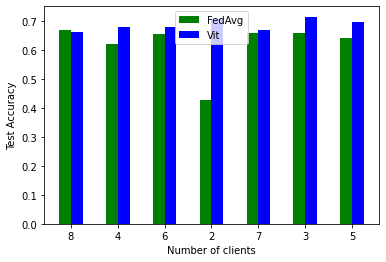

In [ ]:
#Error on lda disc, test loss between clients
#client participation
import matplotlib.pyplot as plt 
import numpy as np

out_folder="/content/medscale/out/" 
clients = [] 
FedAvg_results = []
Vit_results = []
  
for item in os.listdir(out_folder): 
    if ("FedAvg" in item and "client" in item and not "resnet" in item): 
        clients.append(int((re.findall(r'\d+',item)[0]))) 
        file_path= out_folder+item 
        result_item=(extract_serverlog_df(file_path)) 
        FedAvg_results.append(result_item["Results_avg"][9]["test_acc"]) 
        FedAvg_results.append(result_item["Results_avg"][9]["test_acc"]) 

    if ("vit" in item and "client" in item and not "resnet" in item): 
        file_path= out_folder+item 
        result_item=(extract_serverlog_df(file_path)) 
        Vit_results.append(result_item["Results_avg"][9]["test_acc"]) 
  
# setting positions 
pos = np.arange(len(clients)) 
  
# setting width of bars 
width = 0.25 
  
# making bar plot 
plt.bar(pos, (FedAvg_results), width, label = "FedAvg", color = "green") 
plt.bar([p + width for p in pos], (Vit_results), width, label = "Vit", color = "blue") 

# naming the x-axis 
plt.xticks([p + 0.5 * width for p in pos], clients) 
plt.xlabel("Number of clients") 
  
# naming the y-axis 
plt.ylabel("Test Accuracy") 
  
# giving legend 
plt.legend() 
  
# function to show the plot 
plt.show()

{0.1: [2, 4, 48, 88, 88, 92, 148, 278, 448, 558], 0.2: [2, 6, 14, 40, 42, 64, 136, 274, 580, 596], 0.3: [12, 14, 18, 32, 62, 196, 296, 330, 348, 446], 0.4: [16, 22, 44, 94, 126, 182, 184, 304, 346, 436], 0.5: [6, 24, 50, 72, 112, 166, 214, 270, 372, 468], 0.6: [10, 28, 64, 82, 124, 164, 220, 276, 354, 432], 0.7: [14, 30, 72, 90, 134, 168, 224, 284, 338, 400], 0.8: [22, 36, 56, 122, 122, 122, 230, 276, 364, 404], 0.9: [24, 42, 58, 124, 128, 134, 230, 278, 356, 380]}


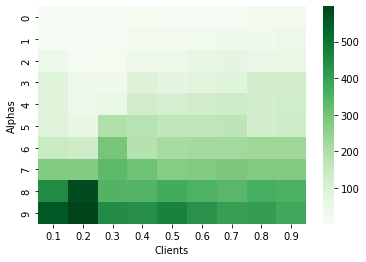

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

out_folder="/content/medscale/out/" 
alphas = [] 
FedAvg_results = []
Vit_results = []
train_nums={}
for item in os.listdir(out_folder): 
    if ("FedAvg" in item and not "client" in item and not "resnet" in item): 
        alpha=float((re.findall(r'0\.\d+',item)[0]))
        train_nums[alpha]=[] 
        file_path= out_folder+item 
        result_item=(extract_clientlog_df(file_path)) 
        for i in range (len(result_item["Results_raw"])):
              train_nums[alpha].append(result_item["Results_raw"][i]['train_total'])

        train_nums[alpha]=(sorted( train_nums[alpha][:10]))
        # FedAvg_results.append(result_item["Results_avg"][9]["train_total"]) 
train_nums = dict(sorted(train_nums.items(), key=lambda x: x[0]))
print(train_nums)

# Create a dataframe with client numbers as columns and alphas as rows
df = pd.DataFrame(train_nums)

# Generate a heatmap
ax = sns.heatmap(df, cmap='Greens')

# Set labels for x-axis and y-axis
ax.set_xlabel("Clients")
ax.set_ylabel("Alphas")

# Show the heatmap
plt.show() 

In [ ]:
# for item in os.listdir("/content/medscale/out"):
#         file_path="/content/medscale/out/"+item
#         f = open(file_path, "r")
#         log = f.read()
#         f.close()
#         datalist=re.split(r"(?=\(server\:590\)\sINFO\:\s)",log)[1:]
#         for item in datalist:
#           print(to_dict(item,"(server:590) INFO: ")      )
          # pd.DataFrame([person1])

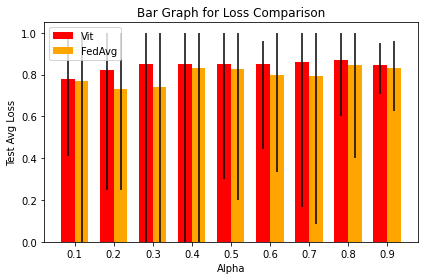

In [ ]:
import numpy as np 
test_bottom_loss=[]
test_top_loss=[]
test_avg_loss_vit=[]
test_avg_loss_fed=[]
test_bottom_loss_vit=[]
test_top_loss_vit=[]
test_top_loss_fed=[]
test_bottom_loss_fed=[]


alphas=[]
counter=0
colors = ['red', 'orange', 'green', 'blue', 'indigo', 'violet', 'pink', 'grey', 'yellow', 'black']

for mode in ["vit","FedAvg"]:
  test_bottom_loss=[]
  test_top_loss=[]
  test_avg_loss=[]
  alphas=[]
  for item in sorted(os.listdir(out_folder)):
      if (mode in item and not "client" in item and not "resnet" in item):
          alphas.append(float((re.findall(r'0\.\d+',item)[0])))
          file_path= out_folder+item

          result_item=(extract_serverlog_df(file_path))
          if mode == "vit":
            test_avg_loss_vit.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_vit.append(np.absolute(result_item["Results_fairness"][9]["test_acc_bottom10%"] - test_avg_loss_vit[-1]))
            test_top_loss_vit.append(np.absolute(result_item["Results_fairness"][9]["test_acc_top10%"] - test_avg_loss_vit[-1]))

          elif mode == "FedAvg":
            test_avg_loss_fed.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_fed.append(np.absolute(result_item["Results_fairness"][9]["test_acc_bottom10%"] - test_avg_loss_fed[-1]))
            test_top_loss_fed.append(np.absolute(result_item["Results_fairness"][9]["test_acc_top10%"] - test_avg_loss_fed[-1]))

X = np.arange(len(alphas))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, test_avg_loss_vit, width, label="Vit", yerr=[test_bottom_loss_vit,test_top_loss_vit],color=colors[0])
rects2 = ax.bar(X + width/2, test_avg_loss_fed, width, label="FedAvg", yerr=[test_bottom_loss_fed,test_top_loss_fed],color=colors[1])

ax.set_xlabel('Alpha')
ax.set_ylabel('Test Avg Loss')
ax.set_title('Bar Graph for Loss Comparison')
ax.set_xticks(X)
ax.set_xticklabels(alphas)
ax.legend()
# plt.ylim?([0,1])

fig.tight_layout()
plt.show()

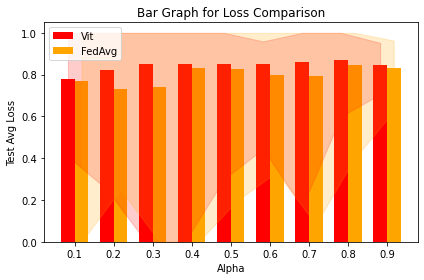

In [ ]:
import numpy as np 
test_bottom_loss=[]
test_top_loss=[]
test_avg_loss_vit=[]
test_avg_loss_fed=[]
test_bottom_loss_vit=[]
test_top_loss_vit=[]
test_top_loss_fed=[]
test_bottom_loss_fed=[]

alphas=[]
counter=0
colors = ['red', 'orange', 'green', 'blue', 'indigo', 'violet', 'pink', 'grey', 'yellow', 'black']

for mode in ["vit","FedAvg"]:
  test_bottom_loss=[]
  test_top_loss=[]
  test_avg_loss=[]
  alphas=[]
  for item in sorted(os.listdir(out_folder)):
      if (mode in item and not "client" in item and not "resnet" in item):
          alphas.append(float((re.findall(r'0\.\d+',item)[0])))
          file_path= out_folder+item

          result_item=(extract_serverlog_df(file_path))
          if mode == "vit":
            test_avg_loss_vit.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_vit.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_vit.append(result_item["Results_fairness"][9]["test_acc_top10%"])

          elif mode == "FedAvg":
            test_avg_loss_fed.append(result_item["Results_weighted_avg"][9]["test_acc"])
            test_bottom_loss_fed.append(result_item["Results_fairness"][9]["test_acc_bottom10%"])
            test_top_loss_fed.append(result_item["Results_fairness"][9]["test_acc_top10%"])

X = np.arange(len(alphas))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, test_avg_loss_vit, width, label="Vit", color=colors[0])
rects2 = ax.bar(X + width/2, test_avg_loss_fed, width, label="FedAvg", color=colors[1])

# Add shaded areas to represent the error bars
ax.fill_between(X - width/2, np.absolute(test_bottom_loss_vit), np.absolute(test_top_loss_vit), alpha=0.2, color=colors[0])
ax.fill_between(X + width/2, np.absolute(test_bottom_loss_fed), np.absolute(test_top_loss_fed), alpha=0.2, color=colors[1])

ax.set_xlabel('Alpha')
ax.set_ylabel('Test Avg Loss')
ax.set_title('Bar Graph for Loss Comparison')
ax.set_xticks(X)
ax.set_xticklabels(alphas)
ax.legend()
# plt.ylim?([0,1])

fig.tight_layout()
plt.show()
 

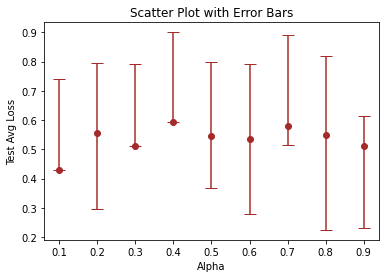

In [ ]:
#Error on lda disc, test loss between clients
out_folder="/content/medscale/out/"
def plot_scatter_errorbar(x, y, yerr_bottom, yerr_top):
    # plt.figure()
    # plt.plot(x,y,'ok')
    plt.errorbar(x, y, yerr = [yerr_bottom, yerr_top], fmt='o',markersize=6,capsize=6,color='brown')

for item in os.listdir(out_folder):
    if ("Avg" in item and not "client" in item and not "resnet" in item):
        alpha=float((re.findall(r'0\.\d+',item))[0])
        file_path= out_folder+item
        test_bottom_loss=[]
        test_top_loss=[]
        test_avg_loss=[]
        result_item=(extract_serverlog_df(file_path))
        test_bottom_loss.append(result_item["Results_fairness"][9]["test_f1_bottom10%"])
        test_top_loss.append(result_item["Results_fairness"][9]["test_f1_std"])
        test_avg_loss.append(result_item["Results_weighted_avg"][9]["test_f1"])
        plot_scatter_errorbar(alpha, test_avg_loss, test_bottom_loss, test_top_loss)
plt.xlabel('Alpha')
plt.ylabel('Test Avg Loss')
plt.title('Scatter Plot with Error Bars')
# plt.ylim((0,3))
plt.show()


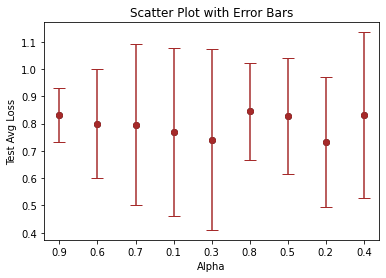

In [ ]:
#Error on lda disc, test loss between clients
out_folder="/content/medscale/out/"
def plot_scatter_errorbar(x, y, yerr_bottom, yerr_top):
    # plt.figure()
 
    plt.plot(x,y,'ok')
    plt.errorbar(x, y, yerr = [yerr_bottom, yerr_top], fmt='o',markersize=6,capsize=6,color='brown')

test_bottom_loss=[]
test_top_loss=[]
test_avg_loss=[]
alpha_list=[]
for item in os.listdir(out_folder):
    if ("Avg" in item and not "client" in item and not "resnet" in item):
        alpha=(re.findall(r'0\.\d+',item))[0]
        file_path= out_folder+item
        alpha_list.append(alpha)
        result_item=(extract_serverlog_df(file_path))
        test_bottom_loss.append(result_item["Results_fairness"][9]["test_acc_std"])
        test_top_loss.append(result_item["Results_fairness"][9]["test_acc_std"])
        test_avg_loss.append(result_item["Results_weighted_avg"][9]["test_acc"])
  
plot_scatter_errorbar(alpha_list, test_avg_loss, test_bottom_loss, test_top_loss)
 
plt.xlabel('Alpha')
plt.ylabel('Test Avg Loss')
plt.title('Scatter Plot with Error Bars')
plt.show()

In [ ]:
result_item["Results_avg"][0]

{'test_f1': 0.0,
 'test_correct': 0.0,
 'test_total': 22.0,
 'test_avg_loss': 11.360457,
 'test_loss': 225.950548,
 'test_acc': 0.0}

In [ ]:
result_item["Results_fairness"][0]

{'test_correct': 0.0,
 'test_total': 22.0,
 'test_f1_std': 0.0,
 'test_f1_bottom_decile': 0.0,
 'test_f1_top_decile': 0.0,
 'test_f1_min': 0.0,
 'test_f1_max': 0.0,
 'test_f1_bottom10%': 0.0,
 'test_f1_top10%': 0.0,
 'test_f1_cos1': 0,
 'test_f1_entropy': 2.302585,
 'test_avg_loss_std': 2.534208,
 'test_avg_loss_bottom_decile': 9.644743,
 'test_avg_loss_top_decile': 18.39122,
 'test_avg_loss_min': 9.120893,
 'test_avg_loss_max': 18.39122,
 'test_avg_loss_bottom10%': 9.120893,
 'test_avg_loss_top10%': 18.39122,
 'test_avg_loss_cos1': 0.976011,
 'test_avg_loss_entropy': 2.280449,
 'test_loss_std': 327.940512,
 'test_loss_bottom_decile': 18.39122,
 'test_loss_top_decile': 1138.079691,
 'test_loss_min': 18.241787,
 'test_loss_max': 1138.079691,
 'test_loss_bottom10%': 18.241787,
 'test_loss_top10%': 1138.079691,
 'test_loss_cos1': 0.567366,
 'test_loss_entropy': 1.54006,
 'test_acc_std': 0.0,
 'test_acc_bottom_decile': 0.0,
 'test_acc_top_decile': 0.0,
 'test_acc_min': 0.0,
 'test_acc_max'

In [ ]:
import dtale
d = dtale.show(df)


ImportError: ignored

In [ ]:

df

,Role,Round,Results_weighted_avg,Results_avg,Results_fairness
0,Server #,0,"{'test_avg_loss': 2.675082, 'test_total': 22.0...","{'test_avg_loss': 2.771264, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 13.0, 'te..."
1,Server #,1,"{'test_avg_loss': 1.096133, 'test_total': 22.0...","{'test_avg_loss': 1.367171, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 14.3, 'te..."
2,Server #,2,"{'test_avg_loss': 1.023156, 'test_total': 22.0...","{'test_avg_loss': 1.275148, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 13.1, 'te..."
3,Server #,3,"{'test_avg_loss': 0.901559, 'test_total': 22.0...","{'test_avg_loss': 1.197491, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 14.9, 'te..."
4,Server #,4,"{'test_avg_loss': 0.81052, 'test_total': 22.0,...","{'test_avg_loss': 1.103055, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 15.7, 'te..."
5,Server #,5,"{'test_avg_loss': 0.792487, 'test_total': 22.0...","{'test_avg_loss': 1.063392, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 15.4, 'te..."
6,Server #,6,"{'test_avg_loss': 0.776148, 'test_total': 22.0...","{'test_avg_loss': 1.048032, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 16.1, 'te..."
7,Server #,7,"{'test_avg_loss': 0.810522, 'test_total': 22.0...","{'test_avg_loss': 1.021849, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 14.5, 'te..."
8,Server #,8,"{'test_avg_loss': 0.818784, 'test_total': 22.0...","{'test_avg_loss': 1.018724, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 14.6, 'te..."
9,Server #,9,"{'test_avg_loss': 0.746126, 'test_total': 22.0...","{'test_avg_loss': 1.032571, 'test_total': 22.0...","{'test_total': 22.0, 'test_correct': 16.1, 'te..."


In [ ]:
df_weighted_average =  df[["Results_weighted_avg","Round"]]
df_weighted_average=df_weighted_average.join(pd.DataFrame(df_weighted_average["Results_weighted_avg"].to_dict()).T)
df_weighted_average.drop(columns=["Results_weighted_avg"])

,Round,test_avg_loss,test_total,test_f1,test_loss,test_correct,test_acc
0,0,2.675082,22.0,0.455844,111.536555,13.0,0.590909
1,1,1.096133,22.0,0.504015,39.553095,14.3,0.650000
2,2,1.023156,22.0,0.457233,37.850180,13.1,0.595455
3,3,0.901559,22.0,0.519151,30.270719,14.9,0.677273
4,4,0.810520,22.0,0.549382,25.773188,15.7,0.713636
5,5,0.792487,22.0,0.533496,25.910916,15.4,0.700000
6,6,0.776148,22.0,0.570052,25.062550,16.1,0.731818
7,7,0.810522,22.0,0.517488,28.983601,14.5,0.659091
8,8,0.818784,22.0,0.523721,30.168402,14.6,0.663636
9,9,0.746126,22.0,0.556276,23.385907,16.1,0.731818


In [ ]:
df_weighted_average

NameError: ignored

In [ ]:
dfNew[["Role"	,"Round"	"Results_weighted_avg",	"Results_avg","	Results_fairness"]]


NameError: ignored

In [ ]:
to_dict(log)

{'Role': 'Server #',
 'Round': 0,
 'Results_weighted_avg': {'test_loss': 233.191082,
  'test_total': 22.0,
  'test_correct': 12.2,
  'test_avg_loss': 3.228431,
  'test_f1': 0.549277,
  'test_acc': 0.554545},
 'Results_avg': {'test_loss': 71.025472,
  'test_total': 22.0,
  'test_correct': 12.2,
  'test_avg_loss': 3.401587,
  'test_f1': 0.149234,
  'test_acc': 0.1775},
 'Results_fairness': {'test_total': 22.0,
  'test_correct': 12.2,
  'test_loss_std': 104.921402,
  'test_loss_bottom_decile': 6.686986,
  'test_loss_top_decile': 363.563051,
  'test_loss_min': 3.73224,
  'test_loss_max': 363.563051,
  'test_loss_bottom10%': 3.73224,
  'test_loss_top10%': 363.563051,
  'test_loss_cos1': 0.560576,
  'test_loss_entropy': 1.520847,
  'test_avg_loss_std': 0.170257,
  'test_avg_loss_bottom_decile': 3.295096,
  'test_avg_loss_top_decile': 3.73224,
  'test_avg_loss_min': 3.081043,
  'test_avg_loss_max': 3.73224,
  'test_avg_loss_bottom10%': 3.081043,
  'test_avg_loss_top10%': 3.73224,
  'test_avg_

In [ ]:
print(type(datadict))

<class 'str'>


In [ ]:
print(datadict['Role'])

TypeError: ignored